### Задание по обработке временных рядов параметров ориентации Земли

Даны данные о движении полюса и параметра LOD. 
* Нужно построить спектр мощности для LOD и для каждой из компонент полюса методом максимальной жнтропии (метод Берга)
* Построить спектр мощности комплексной величины $ X-iY $

In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
import requests
import io
from memspectrum import MESA
from matplotlib import pyplot as plt
from scipy.stats import linregress

%matplotlib inline

sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )

Считываем данные

In [2]:
url_x_y = 'https://hpiers.obspm.fr/eop-pc/products/combined/C04.php?date=2&eop=1&year1=1962&month1=1&day1=1&year2=2022&month2=2&day2=30&SUBMIT=Submit+Search'
url_lod = 'https://hpiers.obspm.fr/eop-pc/products/combined/C04.php?date=2&eop=3&year1=1962&month1=1&day1=1&year2=2022&month2=2&day2=30&SUBMIT=Submit+Search'

In [3]:
response = requests.get(url_x_y)
df_x_y = pd.read_csv(io.StringIO(response.text), names=['date'])
df_x_y = df_x_y.iloc[1:len(df_x_y)-1].reset_index().drop(columns='index')
df_x_y = pd.DataFrame(df_x_y.date.str.split().tolist(), columns=['date','x','sig1','y','sig']).astype(float)

response = requests.get(url_lod)
df_lod = pd.read_csv(io.StringIO(response.text), names=['date'])
df_lod = df_lod.iloc[1:len(df_lod)-1].reset_index().drop(columns='index')
df_lod = pd.DataFrame(df_lod.date.str.split().tolist(), columns=['date','lod','sig']).astype(float)



Построим графики для LOD и координат полюса (х,y)

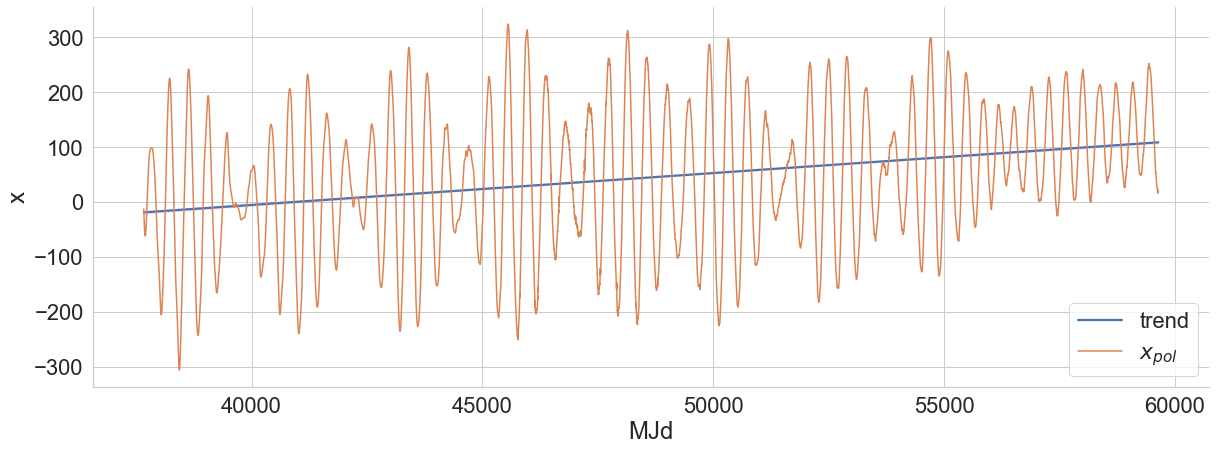

In [4]:
sns.regplot(x="date", y="x", data=df_x_y,  scatter=False)
sns.lineplot(x="date", y="x", data=df_x_y)
sns.lineplot().set_xlabel('MJd')
plt.legend(labels=['trend','$x_{pol}$'])
sns.despine()

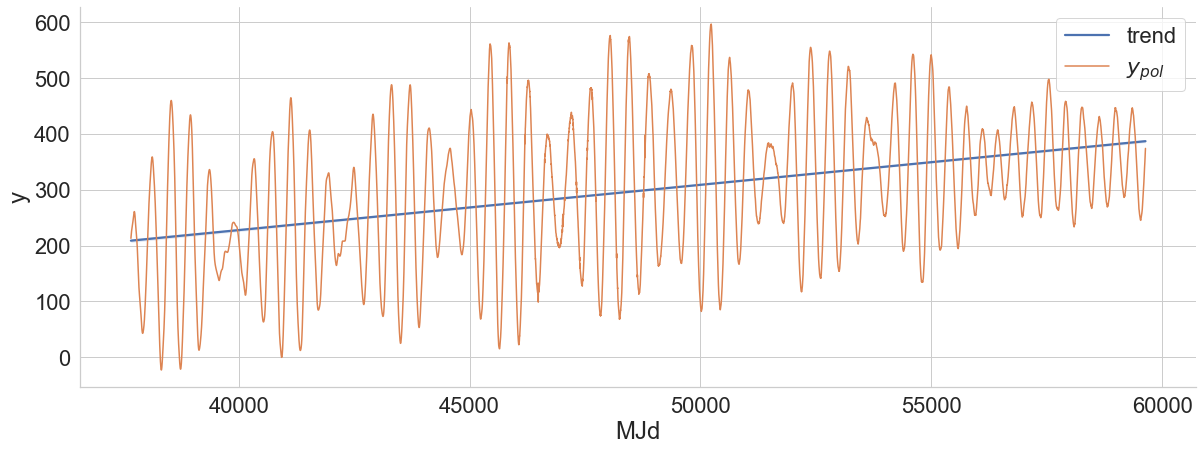

In [5]:
sns.regplot(x="date", y="y", data=df_x_y,  scatter=False)
sns.lineplot(x="date", y="y", data=df_x_y)
sns.lineplot().set_xlabel('MJd')
plt.legend(labels=['trend','$y_{pol}$'])
sns.despine()

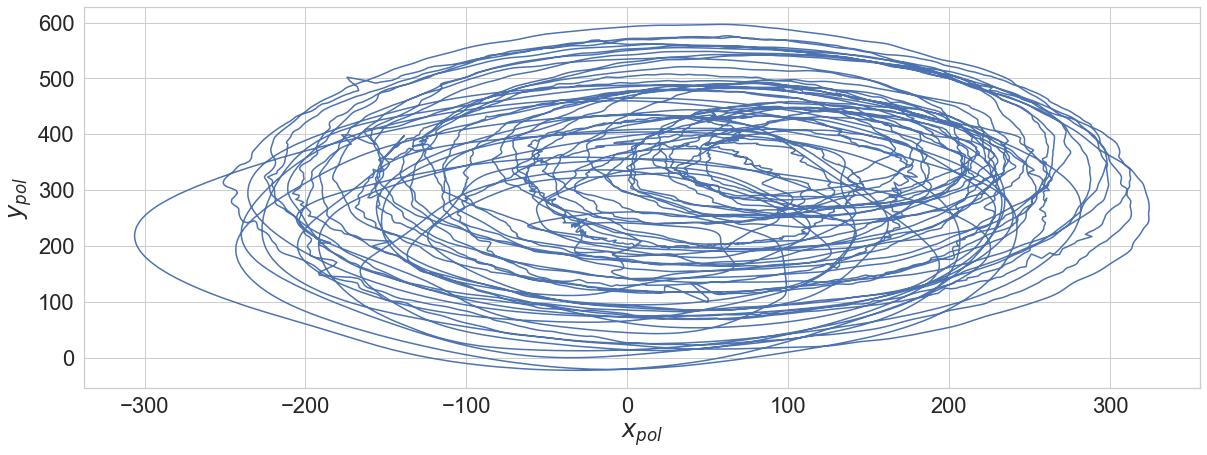

In [6]:
plt.plot(df_x_y.x,df_x_y.y)
plt.xlabel('$ x_{pol} $')
plt.ylabel('$ y_{pol} $')
plt.show()

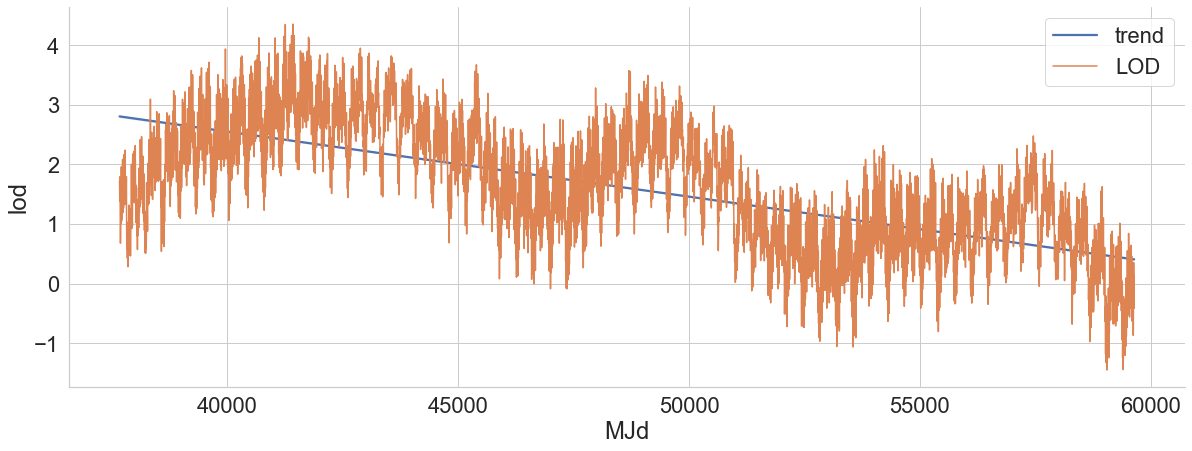

In [7]:
sns.regplot(x="date", y="lod", data=df_lod,  scatter=False)
sns.lineplot(x="date", y="lod", data=df_lod)
sns.lineplot().set_xlabel('MJd')
plt.legend(labels=['trend','LOD'])
sns.despine()

In [8]:
slope, intercept, r_value, p_value, std_err = linregress(df_x_y["date"], df_x_y["x"])
print("Slope:", slope)
print("Intercept:", intercept)

Slope: 0.005810154362758894
Intercept: -237.67055661210304


In [9]:
slope, intercept, r_value, p_value, std_err = linregress(df_x_y["date"], df_x_y["y"])
print("Slope:", slope)
print("Intercept:", intercept)

Slope: 0.008110357358501737
Intercept: -96.67259258217592


In [10]:
slope, intercept, r_value, p_value, std_err = linregress(df_lod["date"], df_lod["lod"])
print("Slope:", slope)
print("Intercept:", intercept)

Slope: -0.00010916605894155184
Intercept: 6.9171006997634255


Вычитаем линейный тренд

In [11]:
x = df_x_y.x - (0.005810242410549027 * df_x_y.x - 237.67451463824636)
y = df_x_y.y - (0.008110272007881267 * df_x_y.y - 96.66875727079679)
lod = df_lod.lod - (-0.00010916523380119184 * df_lod.lod + 6.917063680759665 )

In [12]:
x_iy =  np.array(x) - 1j * np.array(y)
por = 1500
x_iy

array([225.04830472-307.94126933j, 221.86689749-309.03234803j,
       218.78490924-310.12342673j, ..., 258.18166677-464.29284716j,
       258.51969129-465.98401914j, 259.41744464-467.71089916j])

Строим спектр мощности методом Берга для LOD

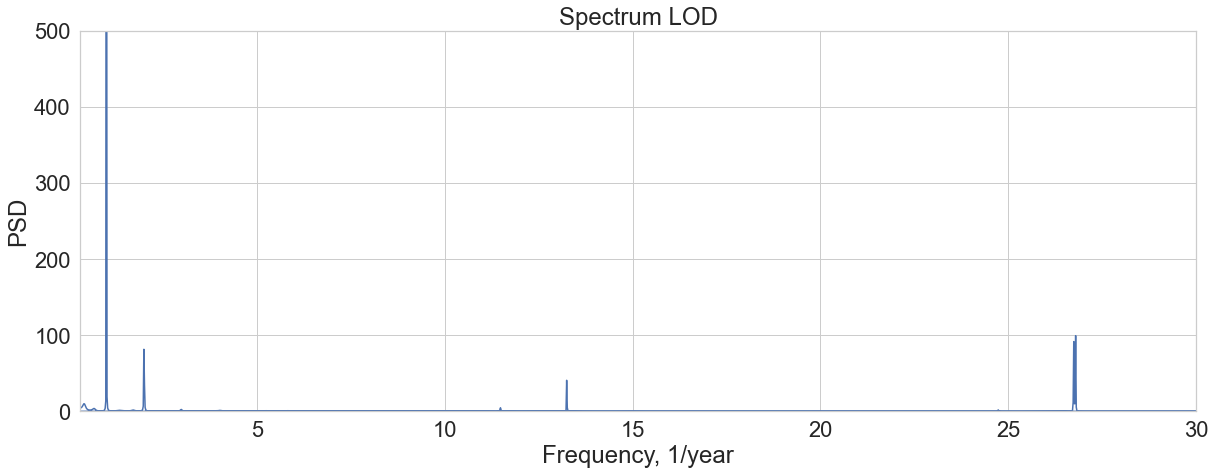

In [13]:
M = MESA()
dt = 1
M.solve(lod, m = por, optimisation_method = "Fixed")
spectrum,frequencies = M.spectrum(dt)
spectrum = spectrum*365.242189
frequencies = frequencies
plt.plot(spectrum,frequencies)
plt.ylim(0,500)
plt.xlim(0.3,30)
plt.xlabel('Frequency, 1/year')
plt.ylabel('PSD')
plt.title('Spectrum LOD')
plt.show()

На низких частотах

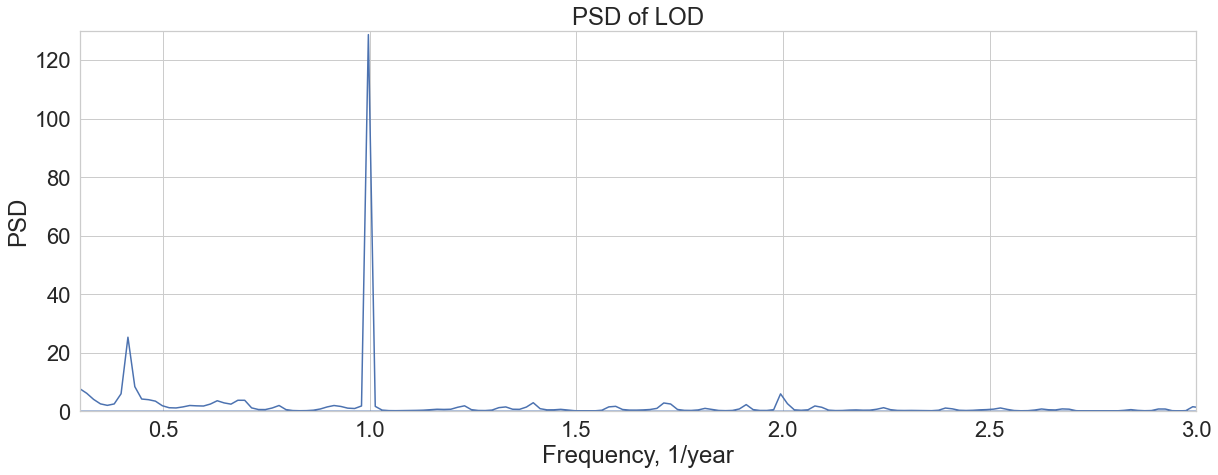

In [14]:
M = MESA()
dt = 1
M.solve(lod, m = 5000, optimisation_method = "Fixed")
spectrum,frequencies = M.spectrum(dt)
spectrum = spectrum*365.242189
frequencies = frequencies
plt.plot(spectrum,frequencies)
plt.ylim(0,130)
plt.xlim(0.3,3)
plt.xlabel('Frequency, 1/year')
plt.ylabel('PSD')
plt.title('PSD of LOD')
plt.show()

Средние частоты

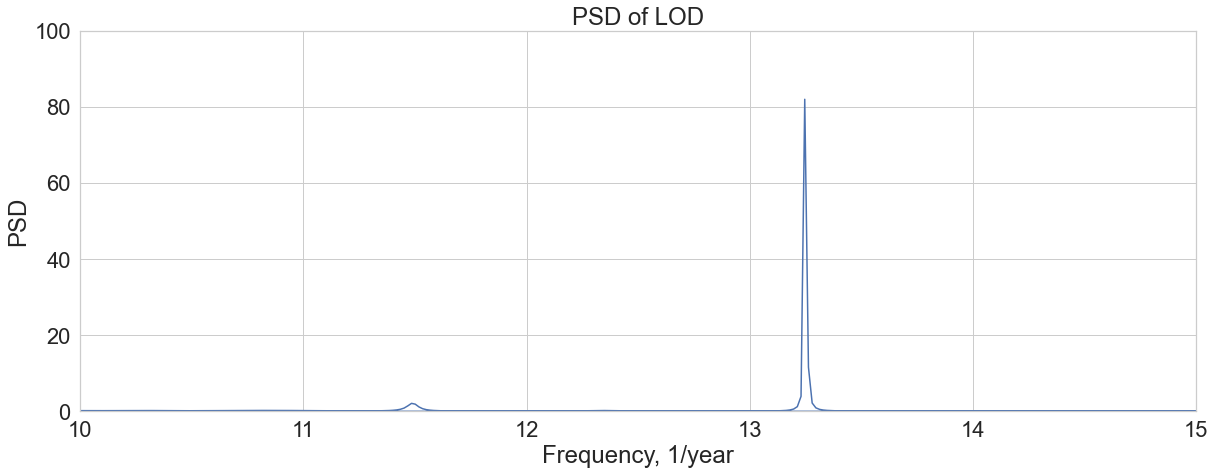

In [15]:
M = MESA()
dt = 1
M.solve(lod, m = 1000, optimisation_method = "Fixed")
spectrum,frequencies = M.spectrum(dt)
spectrum = spectrum*365.242189
frequencies = frequencies
plt.plot(spectrum,frequencies)
plt.ylim(0,100)
plt.xlim(10,15)
plt.xlabel('Frequency, 1/year')
plt.ylabel('PSD')
plt.title('PSD of LOD')
plt.show()

Высокие частоты

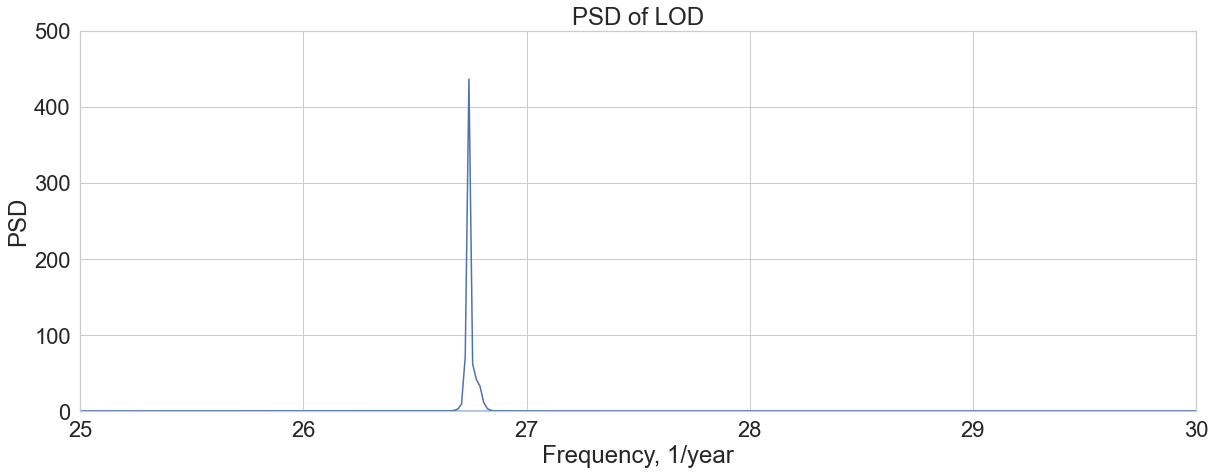

In [16]:
M = MESA()
dt = 1
M.solve(lod, m = 1000, optimisation_method = "Fixed")
spectrum,frequencies = M.spectrum(dt)
spectrum = spectrum*365.242189
frequencies = frequencies
plt.plot(spectrum,frequencies)
plt.ylim(0,500)
plt.xlim(25,30)
plt.xlabel('Frequency, 1/year')
plt.ylabel('PSD')
plt.title('PSD of LOD')
plt.show()

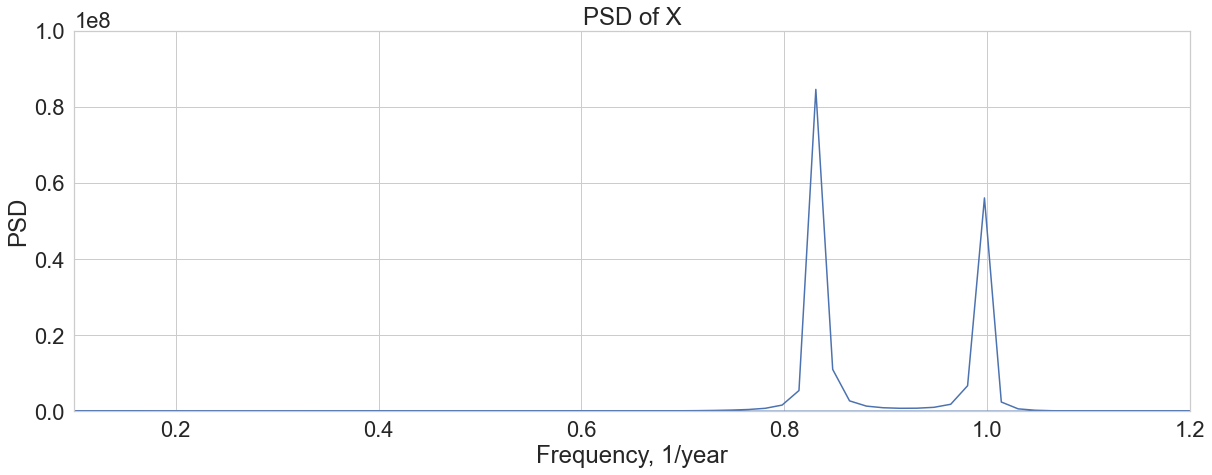

In [17]:
M = MESA()
dt = 1
M.solve(x, m = 1500, optimisation_method = "Fixed")
spectrum,frequencies = M.spectrum(dt)
spectrum = spectrum*365.242189
frequencies = frequencies
plt.plot(spectrum,frequencies)
plt.ylim(0,10*1e7)
plt.xlim(0.1,1.2)
plt.xlabel('Frequency, 1/year')
plt.ylabel('PSD')
plt.title('PSD of X')
plt.show()

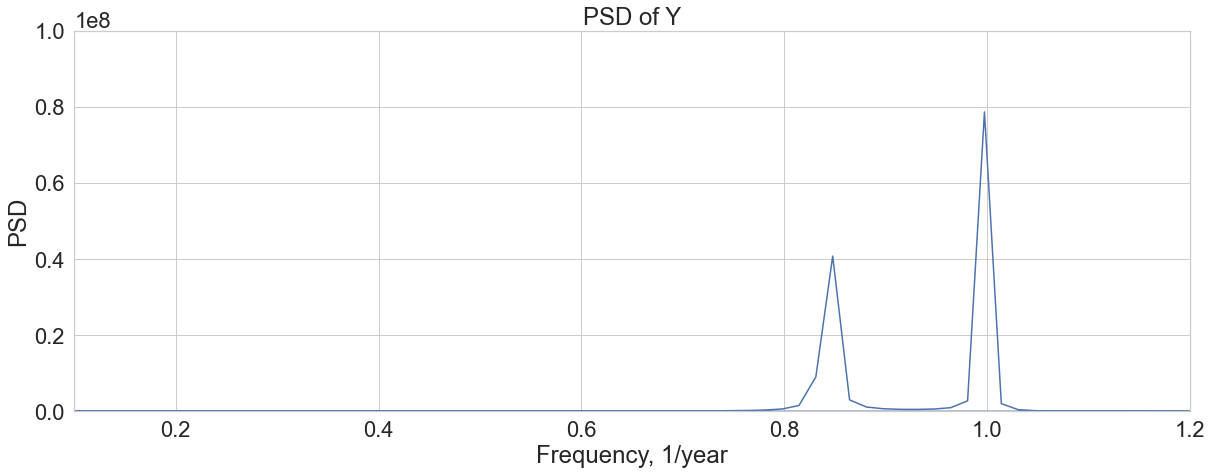

In [18]:
M = MESA()
dt = 1
M.solve(y, m = 1500, optimisation_method = "Fixed")
spectrum,frequencies = M.spectrum(dt)
spectrum = spectrum*365.242189
frequencies = frequencies
plt.plot(spectrum,frequencies)
plt.ylim(0,10*1e7)
plt.xlim(0.1,1.2)
plt.xlabel('Frequency, 1/year')
plt.ylabel('PSD')
plt.title('PSD of Y')

plt.show()

Построим полные спектры для каждой из компонент

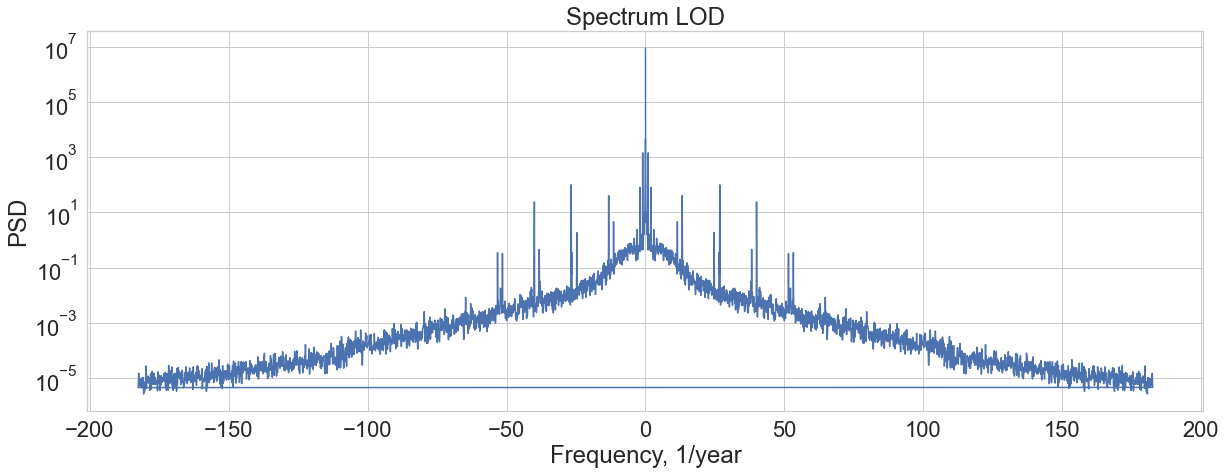

In [19]:
M = MESA()
dt = 1
M.solve(lod, m = por, optimisation_method = "Fixed")
spectrum,frequencies = M.spectrum(dt)
spectrum = spectrum*365.242189
frequencies = frequencies
plt.plot(spectrum,frequencies)
plt.yscale('log')
plt.xlabel('Frequency, 1/year')
plt.ylabel('PSD')
plt.title('Spectrum LOD')
plt.show()

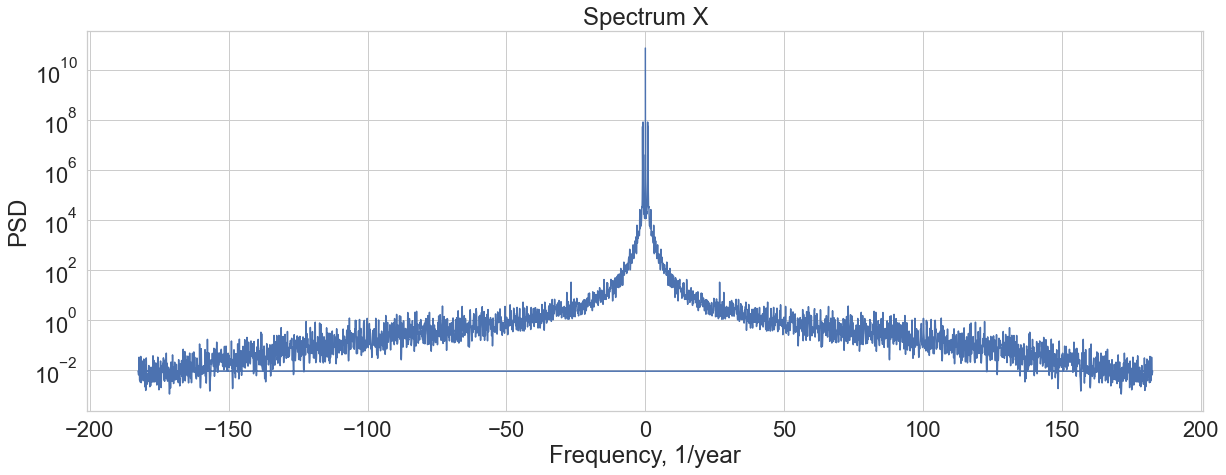

In [20]:
M = MESA()
dt = 1
M.solve(x, m = por, optimisation_method = "Fixed")
spectrum,frequencies = M.spectrum(dt)
spectrum = spectrum*365.242189
frequencies = frequencies
plt.plot(spectrum,frequencies)
plt.yscale('log')
plt.xlabel('Frequency, 1/year')
plt.ylabel('PSD')
plt.title('Spectrum X')
plt.show()

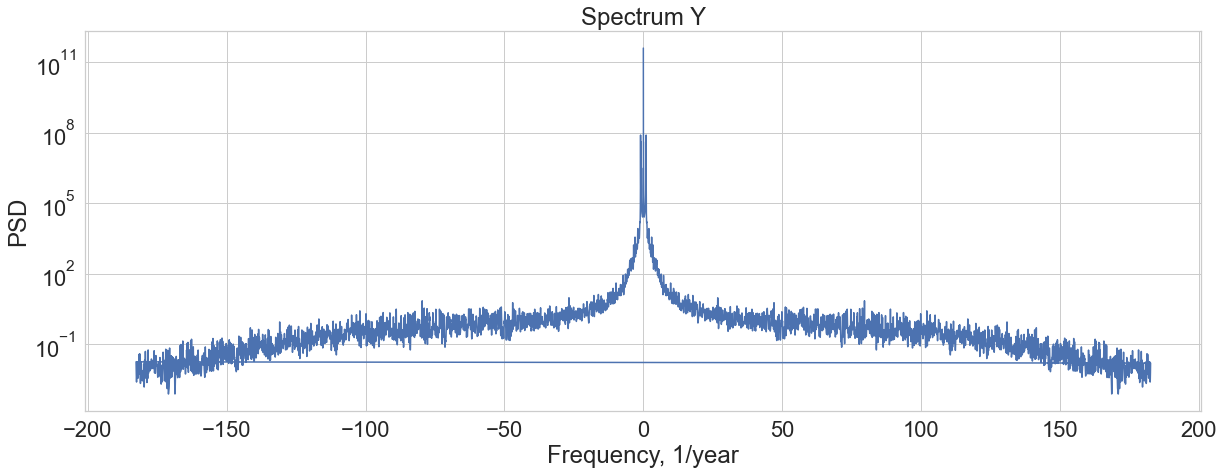

In [21]:
M = MESA()
dt = 1
M.solve(y, m = por, optimisation_method = "Fixed")
spectrum,frequencies = M.spectrum(dt)
spectrum = spectrum*365.242189
frequencies = frequencies
plt.plot(spectrum,frequencies)
plt.yscale('log')
plt.xlabel('Frequency, 1/year')
plt.ylabel('PSD')
plt.title('Spectrum Y')
plt.show()

Построим спектр мощности для $ X-iY $

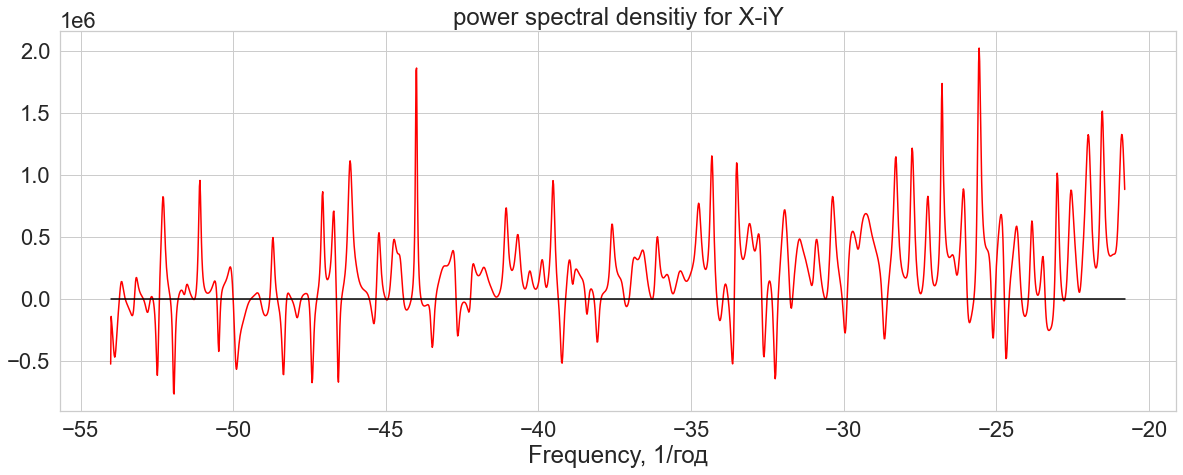

In [ ]:
from spectrum import pburg
spec = pburg(x_iy, 1000, criteria=None, scale_by_freq=True)

powers_burg = np.array(spec.psd).T
freqs = np.array(spec.frequencies(sides='centerdc'))*365.242128


buff = powers_burg[1249:3249]
buff1 = powers_burg[-3250:-1250]
b = []
for i in range(len(buff)):
    b.append(buff1[i] - buff[-i])

b = np.array(b)

a1 = freqs[len(powers_burg)//2 - 3250]
a2 = freqs[len(powers_burg)//2 - 1250]

plt.plot(freqs[len(powers_burg)//2 - 3250:len(powers_burg)//2 - 1250], b, color = "red")
plt.plot([a1,a2],[0,0], color = 'black')
plt.title(label = 'power spectral densitiy for X-iY')
plt.xlabel("Frequency, 1/год")
plt.show()